In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### BUFN400---University of Maryland 

# Homework 4: Geometric Brownian Motion and Log Utility

### By Albert S. (Pete) Kyle

### October 28, 2023


$\newcommand{\E}{\mathrm{E}}$
$\newcommand{\e}{\mathrm{e}}$
$\newcommand{\drm}{\mathrm{\, d}}$
$\newcommand{\var}{\mathrm{var}}$
$\newcommand{\cov}{\mathrm{cov}}$
$\newcommand{\stdev}{\mathrm{stdev}}$
$\newcommand{\sm}{ {\scriptstyle{*}} }$
$\renewcommand{\mm}{{\scriptsize @}}$
$\renewcommand{\t}{^{\mathsf{T}}}$
$\renewcommand{\comma}{\, , \,}$
$\renewcommand{\vec}[1]{\mathbf{#1}}$


# Problem 1: Geometric Brownian Motion

Consider a hypothetical stock market portfolio whose value follows geometric brownian motion.  Assume the continuously compounded real rate of interest is $r_\text{real} = 1$ percent per year, the continuously compounded inflation rate is $i = 4$ percent per year, the continuously compounded risk premium is $\pi = 6$ percent per year, and the annualized standard deviation of log returns is $\sigma = 20$ percent.

A. Display a small dataframe showing the expected nominal value to which one dollar grows after 1, 2, 5, 10, 20, 30, and 100 years. (Hint: The expected value after one year is $1.116\,278$ dollars. Remember that "nominal" returns include inflation, but "real" returns do not. The $\sigma^2/2$ adjustment is not relevant here.)

B. Simulate $N=5000$ sample paths of monthly returns over 100 years. (Hint: If you simulate a Brownian motion and then exponentiate it, remember to adjust the mean of the Brownian motion down by $\frac{\sigma^2}{2} \sm \Delta t$ to make the sample mean of the geometric Brownian motion correct.) 

   1. Along each of the $N$ sample paths, calculate the following statistics: sample mean of nominal monthly gross returns, sample variance of nominal gross monthly returns, sample mean of nominal monthly log returns, and sample variance of nominal monthly log returns over the first 1, 2, 5, 10, 20, 30, 100 years.

   2. Calculate the sample means and sample standard deviations of the $N$ observations for these four statistics over the the 7 time periods. Display a dataframe comparing the sample means and standard deviations of these four statistics with the predicted mean of these four statistics.

   3. What fraction of the portfolios are expected to beat the expected return? What fraction of the portfolios actually beat the expected return? Explain why these fractions are not one half.

C. EXTRA CREDIT: Repeat the analysis in part B using daily data for 1 "year" of 12 "months", each of which as 20 trading days, and subintervals of 1, 4, 12 "months". Compare the results for 12 months of daily data with the results for one year of monthly data. Do the means and standard deviations of the four statistics change much? Specifically, do your results support the intuition that more frequent observations of returns data do not make and estimate of mean returns more accurate but do make estimates of returns standard deviations more accurate?

## 1A.

In [41]:
yrs = [1, 2, 5, 10, 20, 30, 100]
def expected_nom(nominal_rate, yrs):
    return np.exp(nominal_rate * np.array(yrs))

values = expected_nom(0.11, yrs)
df = pd.DataFrame(data=values, index=yrs, columns=['Expected Nominal Value'])
df

,Expected Nominal Value
1,1.116278
2,1.246077
5,1.733253
10,3.004166
20,9.025013
30,27.112639
100,59874.141715


## 1B.

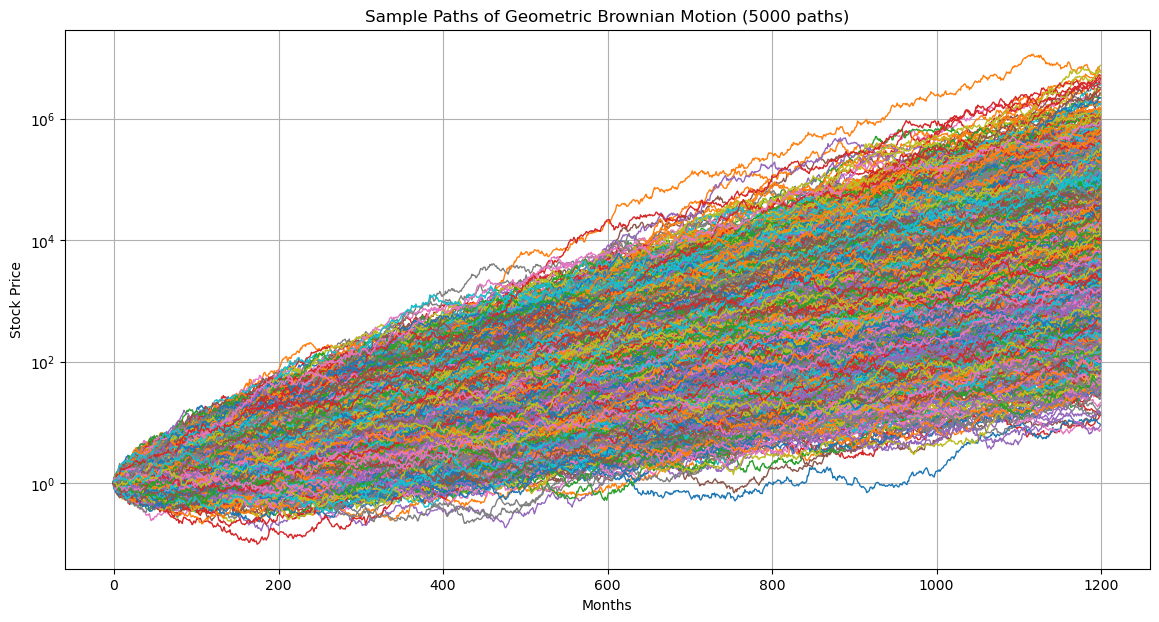

In [42]:
N = 5000
months = 1200
dt = 1/12  
sigma = 0.20

mean_adjusted = 0.11 - 0.5 * 0.20**2

np.random.seed(0)
samples = np.random.normal(loc=mean_adjusted * dt, scale=sigma * np.sqrt(dt), size=(months, N))

paths = np.exp(np.cumsum(samples, axis=0))

plt.figure(figsize=(14, 7))
plt.plot(paths, linewidth=1)
plt.yscale('log')  
plt.title('Sample Paths of Geometric Brownian Motion (5000 paths)')
plt.xlabel('Months')
plt.ylabel('Stock Price')
plt.grid(True)  
plt.show()

In [43]:
nominal_mean = 0.01 + 0.06 + 0.04
monthly_gross_returns = paths[1:] / paths[:-1]
monthly_log_returns = np.log(monthly_gross_returns)

periods = np.array([12, 24, 60, 120, 240, 360, 1200])

stats = pd.DataFrame(index=periods, columns=[
    'Mean Nominal Gross Returns', 'Variance Nominal Gross Returns',
    'Mean Nominal Log Returns', 'Variance Nominal Log Returns',
    'Predicted Mean Gross Return', 'Predicted Variance Gross Return',
    'Predicted Mean Log Return', 'Predicted Variance Log Return'
])

for period in periods:
    mean_gross_return = np.mean(monthly_gross_returns[:period], axis=0)
    var_gross_return = np.var(monthly_gross_returns[:period], axis=0)

    mean_log = np.mean(monthly_log_returns[:period], axis=0)
    var_log = np.var(monthly_log_returns[:period], axis=0)


    stats.loc[period, 'Mean Nominal Gross Returns'] = mean_gross_return.mean()
    stats.loc[period, 'Variance Nominal Gross Returns'] = var_gross_return.mean()
    stats.loc[period, 'Mean Nominal Log Returns'] = mean_log.mean()
    stats.loc[period, 'Variance Nominal Log Returns'] = var_log.mean()

    stats.loc[period, 'Predicted Mean Gross Return'] = np.exp(nominal_mean * dt)
    stats.loc[period, 'Predicted Variance Gross Return'] = (np.exp(sigma ** 2 * dt) - 1) * np.exp(2 * nominal_mean * dt + sigma ** 2 * dt)
    stats.loc[period, 'Predicted Mean Log Return'] = nominal_mean * dt
    stats.loc[period, 'Predicted Variance Log Return'] = sigma ** 2 * dt
stats

,Mean Nominal Gross Returns,Variance Nominal Gross Returns,Mean Nominal Log Returns,Variance Nominal Log Returns,Predicted Mean Gross Return,Predicted Variance Gross Return,Predicted Mean Log Return,Predicted Variance Log Return
12,1.009027,0.003091,0.007333,0.003034,1.009209,0.003412,0.009167,0.003333
24,1.009391,0.003249,0.007686,0.003184,1.009209,0.003412,0.009167,0.003333
60,1.009306,0.003338,0.007599,0.003272,1.009209,0.003412,0.009167,0.003333
120,1.009375,0.00337,0.007667,0.003302,1.009209,0.003412,0.009167,0.003333
240,1.009274,0.003385,0.007565,0.003318,1.009209,0.003412,0.009167,0.003333
360,1.009238,0.003387,0.007531,0.00332,1.009209,0.003412,0.009167,0.003333
1200,1.009226,0.003395,0.007518,0.003328,1.009209,0.003412,0.009167,0.003333


In [44]:
def portfolio_val(paths, period):
    return paths[period - 1]

months = np.array([12, 24, 60, 120, 240, 360, 1200])
years = months / 12
expected = []

for y, m in zip(years, months):
    expected_growth = expected_nom(nominal_mean * dt, m)
    actual_growth = portfolio_val(paths, m)
    
    fraction_expected = np.mean(actual_growth > expected_growth)
    expected.append(fraction_expected)
    
fractions = pd.DataFrame({
    'Time (Years)': years,
    'Fraction Expected to Beat': expected,
})

fractions

,Time (Years),Fraction Expected to Beat
0,1.0,0.4592
1,2.0,0.4462
2,5.0,0.4152
3,10.0,0.3902
4,20.0,0.3272
5,30.0,0.2938
6,100.0,0.1628


The fraction of portfolios expected to beat the expected return is not one-half because of the structure of the Brownian motion. The fraction of portfolios that actually beat the expected return are represented by the above dataframe. Results are distributed lognormally and not symmetrically; therefore, the results will be skewed towards higher values. This is why the expected return is greater than the median return and why the fraction of portfolios expected to beat the expected return is not one-half.

## 1C. (Extra Credit)

In [ ]:
days = 240
dt_daily = 1/240

mu_daily_adj = nominal_mean - 0.5 * sigma ** 2 * dt
np.random.seed(0)
samples_daily = np.random.normal(loc=mu_daily_adj * dt_daily, scale=sigma * np.sqrt(dt_daily), size=(days, N))
paths_daily = np.exp(np.cumsum(samples_daily, axis=0))

plt.figure(figsize=(14, 7))
plt.plot(paths_daily)
plt.yscale('log')  
plt.title('Sample Paths of Geometric Brownian Motion (Daily, 5000 paths)')
plt.xlabel('Months')
plt.ylabel('Stock Price')
plt.grid(True)  
plt.show()

In [ ]:
daily_gross_returns = paths_daily[1:] / paths_daily[:-1]
daily_log_returns = np.log(daily_gross_returns)

interval_days = np.array([20, 80, 240])

results_daily = pd.DataFrame(index=interval_days, columns=[
    'Mean Nominal Gross Returns (Daily)', 'Variance Nominal Gross Returns (Daily)',
    'Mean Nominal Log Returns (Daily)', 'Variance Nominal Log Returns (Daily)'
])

# Calculate statistics for each subinterval
for sub in interval_days:
    mean_gross_daily = np.mean(daily_gross_returns[:sub], axis=0)
    var_gross_daily = np.var(daily_gross_returns[:sub], axis=0)

    mean_log_daily = np.mean(daily_log_returns[:sub], axis=0)
    var_log_daily = np.var(daily_log_returns[:sub], axis=0)

    results_daily.loc[sub, 'Mean Nominal Gross Returns (Daily)'] = mean_gross_daily.mean()
    results_daily.loc[sub, 'Variance Nominal Gross Returns (Daily)'] = var_gross_daily.mean()
    results_daily.loc[sub, 'Mean Nominal Log Returns (Daily)'] = mean_log_daily.mean()
    results_daily.loc[sub, 'Variance Nominal Log Returns (Daily)'] = var_log_daily.mean()
    
results_daily

The means and standard deviations of the four statistics do not change very much. As the expected value of the mean returns does not change very much, we would expect that estimates of these means do not become more accurate with more frequent observations. However, estimates of the standard deviation of the returns should become more accurate with more frequent observations, as more frequent observations (and therefore more data) allow for better estimates of the dispersion / spread around the mean.

# Problem 2: Growth Optimal Portfolio

This problem is a continuation of Problem 1.

Consider an investor who allocates his wealth between the stock market portfolio and a riskfree money market fund earning the real rate plus inflation rate every year. The investor chooses a fixed target fraction of wealth to invest in the equity portfolio. At the end of each month, the investor trades to rebalance the portfolio so that it holds the target fractions in the stock portfolio and the money market fund at the beginning of the next month. Assume that the investor has log utility. As an approximation, this means that the investor chooses the fraction $\alpha$ to invest in stocks to maximize the function $\mu(\alpha) - \tfrac{1}{2} \sm \rho \sm \sigma^2(\alpha)$, where $\mu(\alpha)$ is the expected continuously compounded return on the stock market portfolio, $\sigma^2(\alpha)$ is the variance of log returns on the portfolio, and $\rho=1$ for log utility.

   A. Show that $\mu(\alpha)$ is a simple linear function of $\alpha$, $\sigma^2(\alpha)$ is a simple quadratic function of $\alpha$, and the optimal value of $\alpha$ is $1.50$. Therefore, the optimizing investor invests 150 percent of his wealth in the stock market portfolio and finances this by borrowing 50 percent of the portfolio at the risk-free rate.  Show that the probability of the optimizing investor earning a portfolio return of $-100$ percent in one month is small enough that we might (or might not?) be justified in ignoring it.

   B. Simulate 5000 sample paths of 100 years of monthly rebalanced portfolios with 8 different fractions of wealth in the stock market portfolio equal to 0, 60, 80, 100, 125, 150, 200, and 250 percent. Does bankruptcy ever become sufficiently likely that it cannot be ignored? How should potential bankruptcy be dealt with? For time periods equal to the first 1, 2, 5, 10, 20, 30, and 100 years, calculate a frequency distribution describing which of the 8 portfolios has the highest value at the end of the period. Display the results as a dataframe in which the rows are the 7 time intervals and the columns are the 8 portfolio weights.

   C. Explain whether your results illustrate the concept of "growth optimal portfolio". Specifically, does the portfolio chosen by the log-utility investor beat all of the other portfolios a large fraction of the time, even the portfolios with more leverage and therefore a higher expected return?

## 2A.
To show $\mu(\alpha)$ is linear, note that the risk free rate is $r_f = r_r + i$, where $r_r$ is the real rate and $i$ is the inflation rate. Now, note that the expected return on the portfolio is $r_f + \pi$, where $\pi$ is the risk premium. Therefore, as $\alpha$ is the fraction invested in stocks, we have 

$$\mu(\alpha) = \alpha \cdot (r_f + \pi) + (1-\alpha) \cdot r_f$$
as $\mu(\alpha)$ is a weighted sum of the risk-free return and the expected excess return of the portfolio. To show $\sigma^2(\alpha)$ is a quadratic function of $\alpha$, note that as the risk-free part of the portfolio has no variance, $\sigma^2 (\alpha) = \alpha^2 \cdot \sigma^2$, proving $\sigma^2 (\alpha)$ is a quadratic function of $\alpha$. To maximize this function and prove that this maximum is obtained at $\alpha = 1.50$, we have

$$\mu(\alpha) - \frac 12 \cdot \rho \cdot \sigma^2(\alpha) = \alpha \cdot (r_f + \pi) + (1-\alpha) \cdot r_f- \frac 12 \cdot \rho \cdot \alpha^2 \cdot \sigma^2$$

Taking the first derivative of the above function with respect to $\alpha$, we obtain $(r_f + \pi) - r_f - \rho \cdot \alpha \cdot \sigma^2$. Setting this equal to $0$ and solving for $\alpha$, we obtain $\alpha = \frac{\pi}{\rho \cdot \sigma^2} = \frac{0.06}{1 \cdot  0.20^2} = \frac{0.06}{0.04} = 1.50$, proving that the optimal value of $\alpha$ is $1.50$ and that the optimizing investor invests $150$ percent of their wealth in the portfolio by borrowing $50$ percent of the portfolio at the risk-free rate. To show the probability of the optimizing investor earning a portfolio return of $-100$ percent in one month is small enough that it may be ignored can be done as follows: note that the log return of the portfolio in this case would be $\ln(1 + R) = \ln(0)$. However, $\ln(0)$ is not defined, meaning this probability is also undefined. Therefore, from this, we can say that the probability of a $-100$ percent return in any month is extremely low in this scenario.

## 2B.

In [ ]:
intervals = [1, 2, 5, 10, 20, 30, 100]
def gen_paths(alpha, n, n_months, mu_month, sigma_month):
    sigma_adj = sigma_month * np.sqrt(alpha)
    mu_adj = mu_month * alpha
    monthly_ret = np.random.normal(mu_adj, sigma_adj, (n, n_months))
    
    return np.cumprod(1 + monthly_ret, axis=1)

def distributions(percents, n, n_months, mu_monthly, sigma_monthly, intervals):
    results = {p: [] for p in percents}
    for p in percents:
        currPaths = gen_paths(p, n, n_months, mu_monthly, sigma_monthly)
        for i in intervals:
            optimal = np.argmax(currPaths[:, i * 12 - 1])
            results[p].append(optimal)
            
    return pd.DataFrame(results, index=intervals)

distributions([0, 0.60, 0.80, 1.00, 1.25, 1.50, 2.00, 2.50], 5000, 1200, 0.11, 0.20/np.sqrt(12), intervals)

Bankruptcy does indeed become sufficiently likely in that it cannot be ignored, mainly due to the fact that the portfolio can contain $250$ percent of the individual's net worth. Potential bankruptcy can be dealt with by diversification of investments across different asset classes, lowering the amount of leverage in the portfolio, and constantly monitoring the portfolio to ensure it aligns with the investor's goals.

## 2C.

My results show that the higher-leverage portfolios outperform the other portfolis in certain periods (e.g. shorter ones); this imlpies that increased leverage may improve the performance of the portfolio. Another observation is that as the time interval increases from 5 to 30 years, the strategy with $150$ percent of net worth is the best portfolio in many cases; this implies that portfolios besides the log-utility portfolio do similar to the log-utility portfolio. It is also interesting to note that the $200$ and $250$ percent portfolios sometimes have the highest values at the end of a efw periods; this may be attributed to the fact that high leverage may bring increased losses, which hurts overall portfolio growth. In general, my results do indeed indicate that the portfolio chosen by the log-utility portfolio outperforms the other portfolios for a large percentage of the time over the long term. This does indeed support the concept of ``growth-optimal portfolios," as overall growth is maximized over time.